# Reuters Dataset

1. What is the Reuters dataset?

A dataset of newswires from Reuters labeled by topic.

Used for multi-class text classification.

Contains 11,228 training samples and 7,505 test samples.

Covers 46 different categories/topics.

2. Key Features

Text data is already tokenized as integer sequences in Keras.

Each news article is represented as a sequence of word indices.

Suitable for embedding layers in deep learning models.

3. Why Use Reuters?

Great for experimenting with:

Word embeddings (dense word vectors)

RNNs / LSTMs for text classification

Multi-class classification problems

In [57]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import reuters
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [58]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(f"Number of training examples: {len(train_data)}")
print(f"Number of testing examples: {len(test_data)}")

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number of training examples: 8982
Number of testing examples: 2246


In [59]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)


In [60]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


In [61]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(10000,)),
    Dense(64, activation='relu'),
    Dense(46, activation='softmax')  # 46 categories => softmax
])


In [62]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [63]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.2061 - loss: 3.6134 - val_accuracy: 0.4374 - val_loss: 2.7654
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.5019 - loss: 2.5006 - val_accuracy: 0.6305 - val_loss: 1.8630
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6568 - loss: 1.6938 - val_accuracy: 0.7023 - val_loss: 1.4608
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7270 - loss: 1.2527 - val_accuracy: 0.7257 - val_loss: 1.2620
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7809 - loss: 1.0200 - val_accuracy: 0.7485 - val_loss: 1.1556
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8271 - loss: 0.8417 - val_accuracy: 0.7657 - val_loss: 1.0894
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8604 - loss: 0.6807 - val_accuracy: 0.7746 - val_loss: 1.0393
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8825 - loss: 0.5714 - val_accuracy: 0.7824 - v

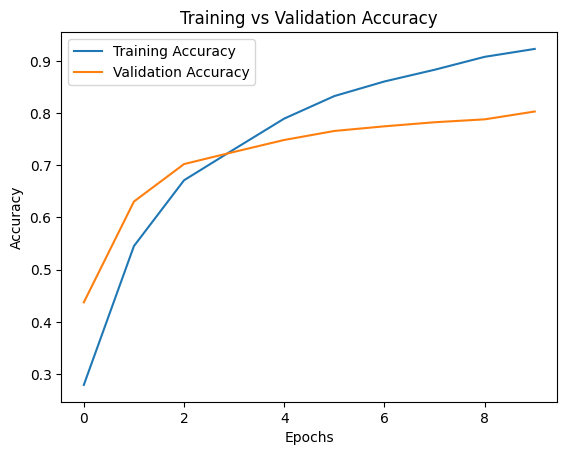

In [64]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [65]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.9595

Test Accuracy: 0.7890


In [66]:
predictions = model.predict(X_test)
predicted_class = np.argmax(predictions[0])
print(f"Predicted class for first test sample: {predicted_class}")


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted class for first test sample: 3
